# Some PCA Notes #

## Make data with make_blobs ##

In [63]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [73]:
X, _ = make_blobs(200, n_features=5, centers=1)

In [74]:
X[:7]

array([[-4.37882499,  7.83179375,  6.02614978,  2.68651399, -7.45443482],
       [-4.64553451,  6.50433723,  6.29247306, -0.10710421, -5.62574164],
       [-5.38127081,  6.85150304,  6.16322617,  1.09895092, -5.60759556],
       [-4.40273544,  5.88751556,  7.09542304,  1.4004206 , -6.3480884 ],
       [-4.35513992,  8.18381751,  6.31225736,  0.27935428, -5.90706693],
       [-3.46701601,  7.95751811,  6.36222061,  1.45993586, -8.06003331],
       [-3.28405176,  6.86674533,  7.42698097,  0.60805316, -6.15814416]])

### How to visualize? ###

We can always just 'project onto a couple of variables.  It's like casting a shadow.

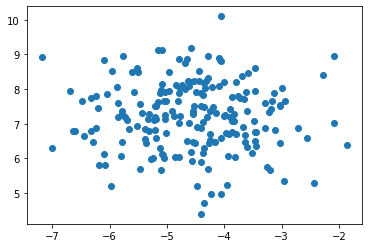

In [75]:
plt.scatter(X[:,0], X[:,1])

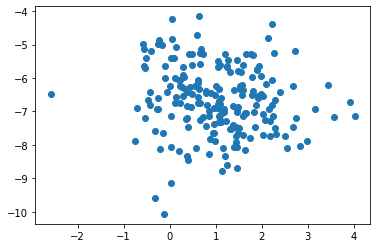

In [76]:
plt.scatter(X[:,3], X[:,4])

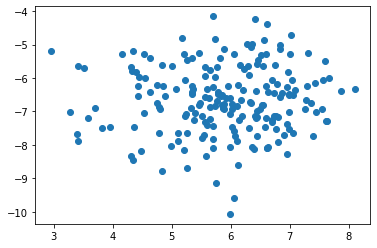

In [77]:
plt.scatter(X[:,2], X[:,4])

### Question:  Is there a best way to project? ###
### PCA is the answer . . . . ###

## Another Dataset to work with ##

The wine dataset is used in Chapter 5 (and elsewhere) of the book.  The "wine" file is located in my folder;  Note also that the columns are described in the wine.names file.  This explains that the first column is a predictor variable that we won't be using. 

In [33]:
mydata = np.genfromtxt("/home/employee/aleahy/CS323/Jupyter/Data/wine/wine.data", delimiter=',')

In [34]:
mydata.shape

(178, 14)

In [35]:
mydata[:,0]  # The first column is a categorical variable .

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

In [31]:
mydata[:,1:14].shape

(178, 13)

In [37]:
mydata[:5,1:14]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [38]:
newdata = mydata[:,1:14] # Drop the first column

## The Wine dataset: Covariance matrix ##

We'll try using [np.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) for the covariance matrix. The obvious syntax doesn't work.  See the web page for an explanation. 

In [39]:
np.cov(newdata)

array([[ 85970.56444103,  84751.72952821,  95575.3906141 , ...,
         67354.90943846,  67776.00743141,  45044.58728333],
       [ 84751.72952821,  83597.74527564,  94295.61615449, ...,
         66361.31080769,  66777.13412628,  44351.29481667],
       [ 95575.3906141 ,  94295.61615449, 106377.41735641, ...,
         74821.40418718,  75290.71301731,  49996.35823333],
       ...,
       [ 67354.90943846,  66361.31080769,  74821.40418718, ...,
         52806.45314231,  53135.11780705,  35342.03705   ],
       [ 67776.00743141,  66777.13412628,  75290.71301731, ...,
         53135.11780705,  53466.1271359 ,  35561.3955    ],
       [ 45044.58728333,  44351.29481667,  49996.35823333, ...,
         35342.03705   ,  35561.3955    ,  23676.93273333]])

In [40]:
np.cov(newdata).shape  # Notice that this 

(178, 178)

You need to take transpose of the matrix.

In [42]:
np.cov(newdata.T).shape  # This has the right shape

(13, 13)

In [44]:
np.cov(newdata.T)[:4,:4]  # narrowing down, we can see that it is also symmetric

array([[ 0.65906233,  0.08561131,  0.04711516, -0.8410929 ],
       [ 0.08561131,  1.2480154 ,  0.05027704,  1.07633171],
       [ 0.04711516,  0.05027704,  0.07526464,  0.40620828],
       [-0.8410929 ,  1.07633171,  0.40620828, 11.15268616]])

##  The eigendecomposition using numpy ##

In [64]:
lambd, vecs = np.linalg.eig(np.cov(newdata.T))  # What do these give us?

In [68]:
lambd  # These are the eigenvalues

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 8.20370314e-03, 2.10723661e-02, 3.75759789e-02,
       7.17026032e-02])

In [69]:
vecs.shape  # These are the eigenvectors 

(13, 13)

In [89]:
vecs

array([[-1.65926472e-03, -1.20340617e-03,  1.68738094e-02,
         1.41446778e-01, -2.03369773e-02,  1.94120104e-01,
        -9.23280337e-01,  2.84820658e-01,  8.66006124e-02,
         8.02924535e-03,  1.56514071e-02, -1.49715080e-02,
        -2.24499994e-03],
       [ 6.81015556e-04, -2.15498184e-03,  1.22003373e-01,
         1.60389543e-01,  6.12883454e-01,  7.42472963e-01,
         1.50109941e-01, -6.46744678e-02,  1.56621385e-02,
        -1.10903923e-02, -6.72955455e-02, -2.31876506e-02,
        -1.85093501e-02],
       [-1.94905742e-04, -4.59369254e-03,  5.19874304e-02,
        -9.77280992e-03, -2.01755752e-02,  4.17529118e-02,
        -4.50095493e-02, -1.49339532e-01,  7.36498524e-02,
        -1.73685673e-01,  1.32063034e-01,  9.54010643e-01,
        -8.67996529e-02],
       [ 4.67130058e-03, -2.64503930e-02,  9.38593003e-01,
        -3.30965260e-01, -6.43523403e-02, -2.40653026e-02,
        -3.15265835e-02,  1.51539118e-02,  2.04457785e-03,
         1.93956297e-03, -5.39380582e

## An SKLearn Package for PCA: Applied to the 'Blob' ##

In [46]:
from sklearn.decomposition import PCA

In [95]:
mypca2 = PCA(n_components = 3)

In [100]:
myXprinc = mypca2.fit(X)

In [102]:
myXprinc.explained_variance_ratio_

array([0.23404512, 0.22007965, 0.20264687])

In [103]:
np.cumsum(myXprinc.explained_variance_ratio_)

array([0.23404512, 0.45412477, 0.65677164])

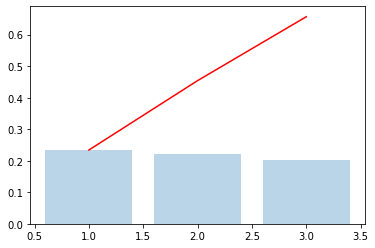

In [113]:
plt.plot(range(1,4), np.cumsum(myXprinc.explained_variance_ratio_), c="red")
plt.bar(range(1,4), myXprinc.explained_variance_ratio_, alpha=0.3)
plt.show()

In [108]:
myXprinc.components_

array([[ 0.40866063, -0.42129078, -0.28883758, -0.40579597,  0.63828916],
       [ 0.01934317, -0.45493527, -0.70872949,  0.34447009, -0.41437013],
       [ 0.69623   ,  0.40772576, -0.14135023, -0.34379802, -0.45918028]])

In [110]:
myXprinc.components_.shape

(3, 5)